In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from keras.utils import np_utils
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)


228818944/228813984 [==============================] - 277s 1us/step


In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


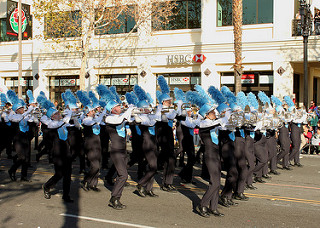

In [23]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[10]))

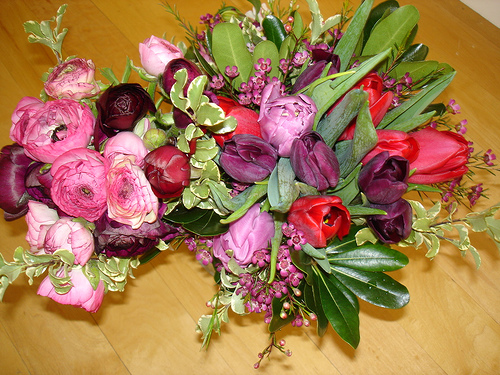

In [30]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[10]))

In [38]:
batch_size = 32
img_height = 180
img_width = 180
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [47]:
train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.8,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for training.


In [48]:
val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [49]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


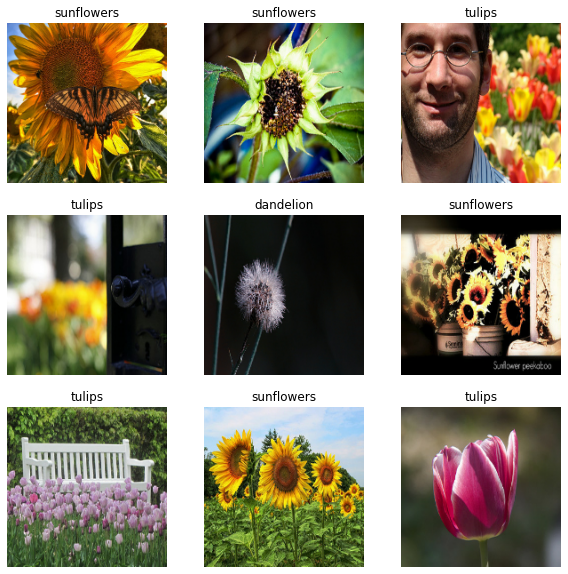

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [64]:
for i,j in train_ds:
    print(i.shape)
    print(j.shape)
    break

(32, 180, 180, 3)
(32,)


In [70]:
AUTOTUNE =  tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds  = val_ds.cache().prefetch(AUTOTUNE)

AttributeError: module 'tensorflow._api.v2.data' has no attribute 'AUTOTUNE'

In [66]:
normalization_layer = layers.Rescaling(1./255)

AttributeError: module 'tensorflow.keras.layers' has no attribute 'Rescaling'